In [16]:
from bspline import bspline
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time as time
import math

In [5]:
def noise(x, y, line_count, noise_type='gradient'):
    if noise_type == 'gradient':
        return np.random.randn(x.shape[0],)*x*(y+1)/(x.shape[0]*2*(line_count))
    elif noise_type == 'circle':
        return np.random.randn(x.shape[0],)\
    *np.sin(x*math.pi/x.shape[0])\
    *np.cos((y-line_count/2.0)*math.pi/line_count)/2.5
    elif noise_type == 'sin2':
        return np.random.randn(x.shape[0],)\
    *np.sin(x*math.pi/x.shape[0])**2\
    *np.cos((y-line_count/2.0)*math.pi/line_count)**2/2.5

In [13]:
def generate(line_color='k', 
             background_color='w',
             noise_type='gradient', 
            line_count=20,
            inner_reps=100,
            outer_reps=5,
            randomize_x=True):
    
    length = 100
    spacing = 1
    
    f, ax = plt.subplots()

    x = np.arange(0, length, 1)
    for y in range(0, line_count):
        for main_rep in range(0, outer_reps):
            n = noise(x, y, line_count, noise_type=noise_type)
            for repetition in range(0, inner_reps):
                if randomize_x:
                    cv = np.stack((x+np.random.randn()*2*n, n*((np.random.randn()/2+1)))).transpose()
                else:
                    cv = np.stack((x, n*((np.random.randn()/2+1)))).transpose()
                yspline = bspline(cv, n=200, degree=10)
                plt.plot(yspline[:,0], yspline[:,1]-y*spacing, 
                         color=line_color, alpha=20.0/inner_reps, ls='-', lw=.1)

    ax.set_frame_on(False)

    ax.set_yticks([])
    ax.set_xticks([])
    f.patch.set_facecolor(background_color)
    f.set_size_inches(20, 20)

    f.savefig('%s_%d.png'%(noise_type, int(time.time())))

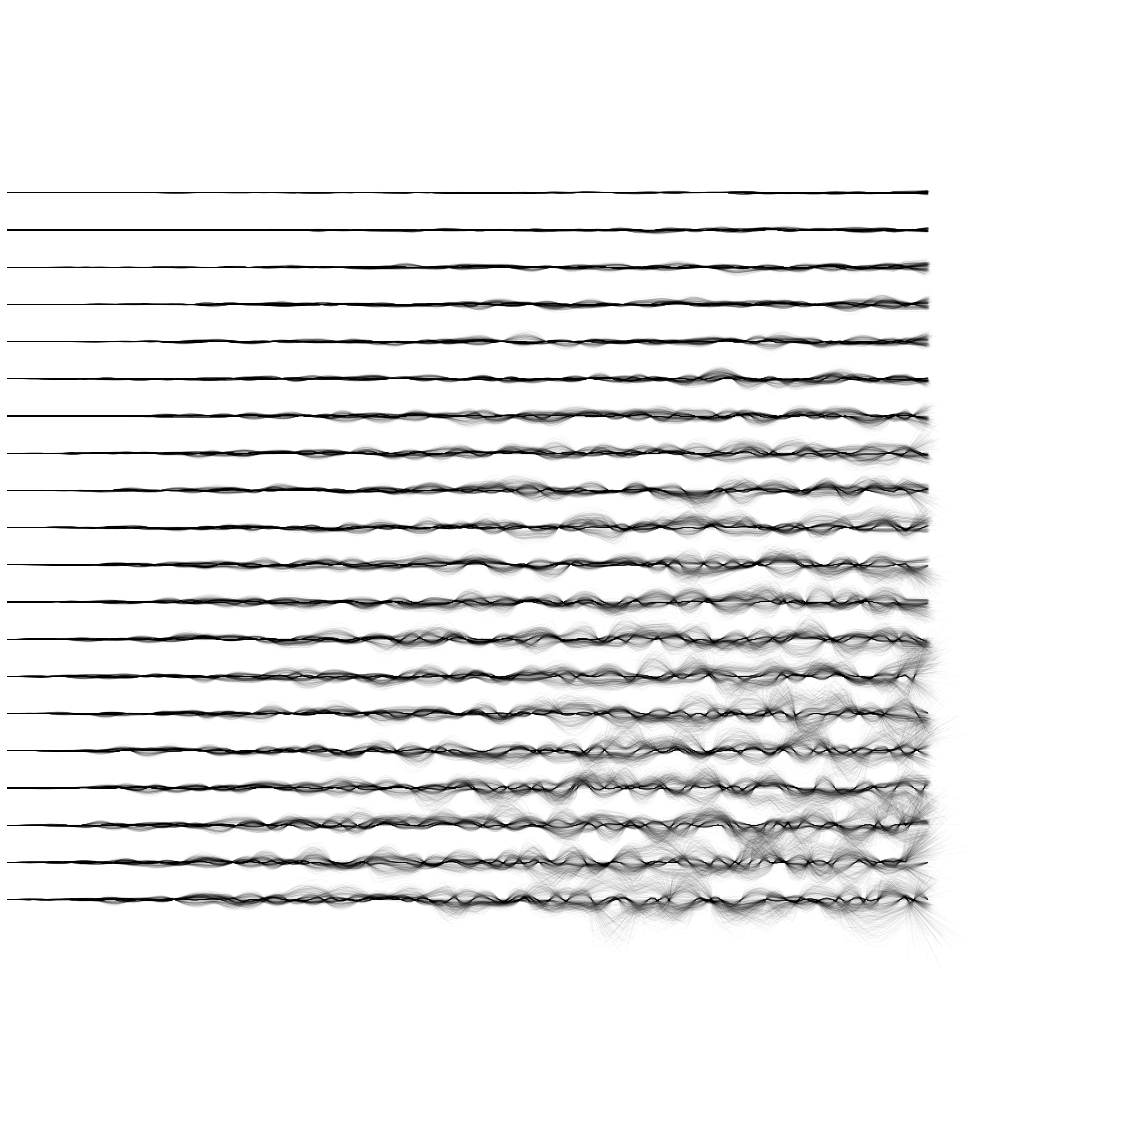

In [14]:
generate(noise_type='gradient')

In [ ]:
generate(noise_type='circle')


In [ ]:
generate(noise_type='sin2')